In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

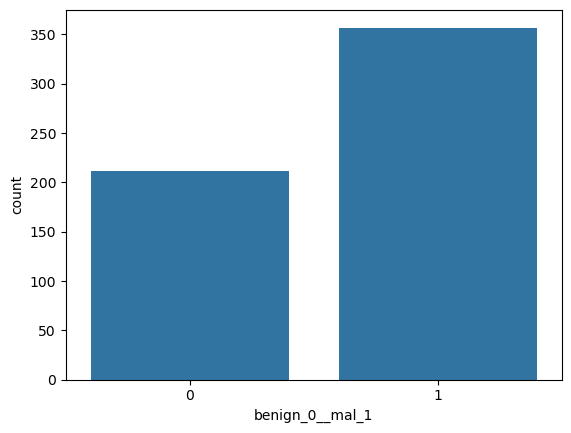

In [9]:
sns.countplot(x='benign_0__mal_1', data = df)

<Axes: >

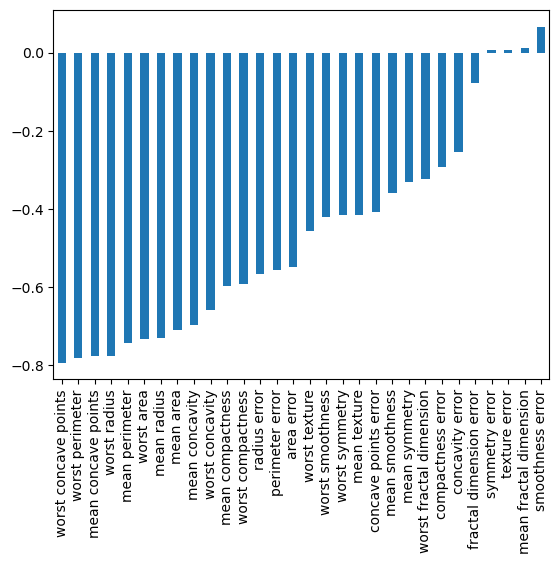

In [19]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

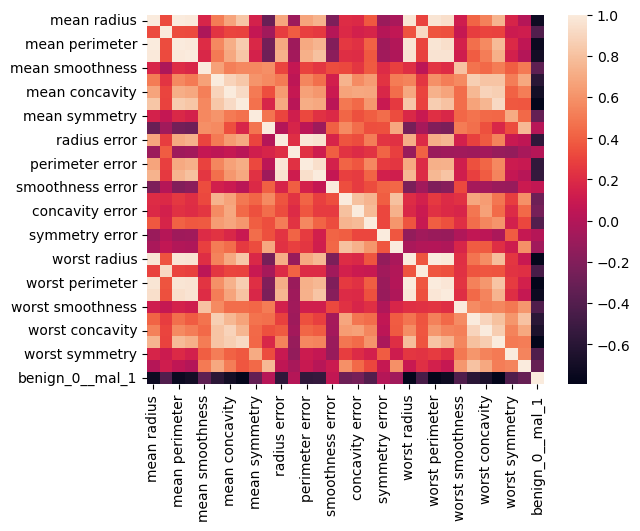

In [23]:
sns.heatmap(df.corr())

In [25]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1']

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test = scaler.transform(X_test)

In [39]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense, Dropout

In [43]:
X_train.shape

(426, 30)

In [45]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [49]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.6828 - val_loss: 0.6569
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6463 - val_loss: 0.6141
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6032 - val_loss: 0.5728
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5604 - val_loss: 0.5224
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4997 - val_loss: 0.4697
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.4478 - val_loss: 0.4137
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3836 - val_loss: 0.3673
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3673 - val_loss: 0.3295
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3037 - val_loss: 0.2971
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2961 - val_loss: 0.2713
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2699 - val_loss: 0.2489
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

<Axes: >

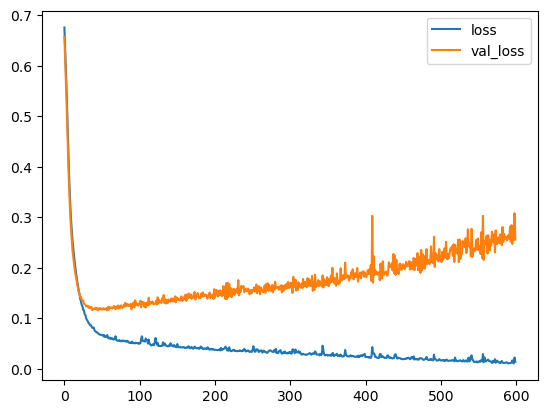

In [55]:
pd.DataFrame(model.history.history).plot()

In [57]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [61]:
from tensorflow.keras.callbacks import EarlyStopping 

In [63]:
early_stop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 25)

In [65]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.6788 - val_loss: 0.6636
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6556 - val_loss: 0.6391
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6296 - val_loss: 0.6045
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.5903 - val_loss: 0.5515
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5260 - val_loss: 0.4851
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4712 - val_loss: 0.4217
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3970 - val_loss: 0.3641
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3536 - val_loss: 0.3200
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3014 - val_loss: 0.2847
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2741 - val_loss: 0.2566
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2459 - val_loss: 0.2361
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

<Axes: >

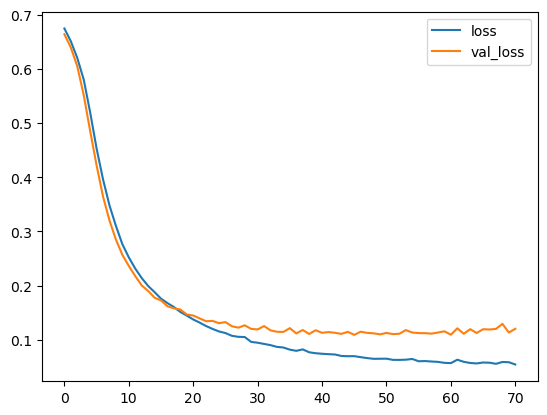

In [69]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [71]:
from tensorflow.keras.layers import Dropout

In [73]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [75]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - loss: 0.7176 - val_loss: 0.6869
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6928 - val_loss: 0.6737
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6829 - val_loss: 0.6625
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6784 - val_loss: 0.6517
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.6677 - val_loss: 0.6394
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6475 - val_loss: 0.6231
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6466 - val_loss: 0.6039
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.6148 - val_loss: 0.5825
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6032 - val_loss: 0.5594
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6025 - val_loss: 0.5349
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5630 - val_loss: 0.5109
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

<Axes: >

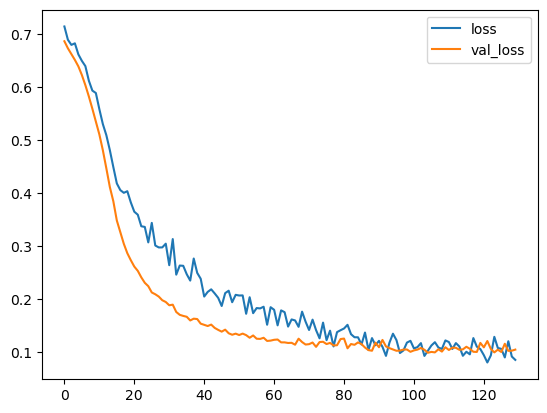

In [77]:
 pd.DataFrame(model.history.history).plot()

In [81]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

NameError: name 'x_test' is not defined